# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background

In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions
In this exercise, you will:

critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
construct a statistically sound analysis and make recommendations of your own
More instructions provided below. Include your work in this notebook and submit to your Github account.
Resources
Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


In [38]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import stats
import seaborn as sns

In [6]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('C:/Users/Kiran.Asknani/Downloads/1508961248_hospital_readmit/hospital_readmit/data/cms_hospital_readmissions.csv')
hospital_read_df.head(2)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013


In [13]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:,'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Kiran.Asknani\AppData\Roaming\Python\Python36\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


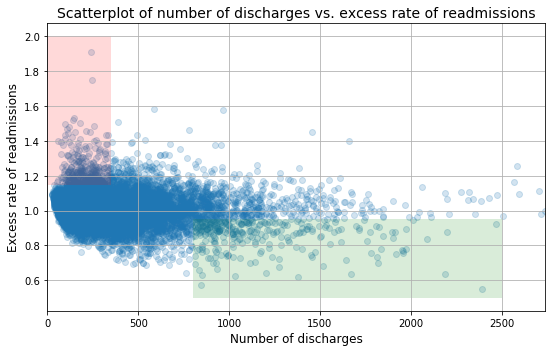

In [14]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

# Preliminary Report
Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

#### A. Initial observations based on the plot above

- Overall, rate of readmissions is trending down with increasing number of discharges
- With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
- With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)

#### B. Statistics
- In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1
- In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1

#### C. Conclusions
- There is a significant correlation between hospital capacity (number of discharges) and readmission rates.
- Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

#### D. Regulatory policy recommendations
- Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
- Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.


# Exercise
Include your work on the following in this notebook and submit to your Github account.

A. Do you agree with the above analysis and recommendations? Why or why not?

B. Provide support for your arguments and your own recommendations with a statistically sound analysis:
    1. Setup an appropriate hypothesis test.
    2. Compute and report the observed significance value (or p-value).
    3. Report statistical significance for $\alpha$ = .01.
    4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
    5. Look at the scatterplot above.
    6. What are the advantages and disadvantages of using this plot to convey information?
    7. Construct another plot that conveys the same information in a more direct manner.

You can compose in notebook cells using Markdown:

In the control panel at the top, choose Cell > Cell Type > Markdown
Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

# A. Do you agree with the above analysis and recommendations? Why or why not?

I don't entirely agree with the above Preliminary report because of missing sound statistical analysis and analysis was based only on graph. Below are my comments.

1) The missing data is handled properly above by dropping rows with null values (except for Footnote columns).

2) Initial observations are entirely based on plot alone and not tested for statistical significance and correlation coefficient was not calculated.

3) In the statistical analysis - There is no "Hypothesis test" done and hospital capacity was grouped only into two: number of discharges 1000. The group of 100 <=number of discharges<=1000 was left out. This means the calculated percentages of hospitals with excess readmission rate (63% and 44%) is only for the two groups missing a big chunk of the hospitals in the population.

4) Conclusions are not backed with a solid statistical analysis and Hypothesis testing for proof.

5) In the statistics part, hospital capacity was divided in two groups which can imply that small hospitals have number of discharges <100. However in the recommendation part, small capacity hospitals was defined as hospitals with number of discharges <300 which is inconsistent and can create confusion.

In [16]:
clean_hospital_read_df.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11578.000000,11578.000000,81.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257681.537226,362.909397,7.0,1.007504,17.984292,17.865695,63.633731
std,154542.645531,309.176945,0.0,0.091964,5.487651,5.240749,59.540296
min,10001.000000,0.000000,7.0,0.549500,2.700000,3.900000,11.000000
25%,110129.750000,157.000000,7.0,0.952600,16.300000,16.600000,24.000000
50%,250040.000000,280.000000,7.0,1.003500,19.000000,19.000000,45.000000
75%,390041.000000,472.750000,7.0,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,7.0,1.909500,32.800000,28.000000,879.000000


In [22]:
hospital_read_df.shape

(16860, 12)

In [21]:
clean_hospital_read_df.shape #indictaes how many records were cleaned up 

(11578, 12)

# B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

## 1. Hypothesis test.

    -Ho: There is no significant correlation between hospital capacity(number of discharges) and readmission rates 
    -H1: Ho: There is significant correlation between hospital capacity(number of discharges) and readmission rates

In [24]:
clean_hospital_read_df=clean_hospital_read_df[clean_hospital_read_df['Number of Readmissions'].notnull()] #removing null values

In [26]:
clean_hospital_read_df.head(2)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013


In [27]:
clean_hospital_read_df['Number of Discharges']=pd.to_numeric(clean_hospital_read_df['Number of Discharges'])

In [28]:
clean_hospital_read_df.corr()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
Provider Number,1.000000,-0.008849,NaN,-0.012112,-0.009049,-0.003710,-0.009099
Number of Discharges,-0.008849,1.000000,NaN,-0.097398,-0.135163,-0.131091,0.791272
Footnote,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Excess Readmission Ratio,-0.012112,-0.097398,NaN,1.000000,0.200039,-0.031104,0.117600
Predicted Readmission Rate,-0.009049,-0.135163,NaN,0.200039,1.000000,0.965420,0.361033
Expected Readmission Rate,-0.003710,-0.131091,NaN,-0.031104,0.965420,1.000000,0.330527
Number of Readmissions,-0.009099,0.791272,NaN,0.117600,0.361033,0.330527,1.000000


In [31]:
#Correlation of number of discharges with Excess Readmission rate
corr1=-0.097398 # indicates there is a negative correlation between Number of discharges and Excess Readmission ratio

In [32]:
#Pearson Correlation Cofficient
corr1_square=corr1**2
corr1_square

0.009486370404

In [33]:
Total_hospitals=clean_hospital_read_df.shape[0]
Total_hospitals

11497

# Q2B. Calculation p-value and comparing with threshold of alpha=0.05

In [34]:
t_statistic=((corr1*np.sqrt(Total_hospitals-2))/np.sqrt(1-corr1_square))
t_statistic

-10.492386957113085

In [36]:
df= Total_hospitals-2  #degrees of freedom for t-distributiuon

In [37]:
p_value = stats.t.sf(np.abs(t_statistic), df)*2  # two-sided pvalue = Prob(abs(t)>tt)
p_value

1.2224686234119185e-25

Since pvalue<0.05 so we can reject Ho and accept H1: There is significant correlation between hospital capacity and excess readmission ratio.

The negative sign of the correlation coefficient means number of discharges and excess readmission rate has a negative correlation, a very small correlation. Meaning as the number of discharges increase there is a very very small increase in the excess readmission ratio

Also Looking at the corr_squared (pearson correlation coefficient squared) which is <1%, this means only <1% of variability in the exess readmission ratio can be explained by number of discharges.



# Q3B. Report statistical significance for alpha = .01

The statistical significance for alpha=.01 will be the same as when alpha=.05 because p_value will be calculated the same way and p_value is less than 0.01 so the above result stays same.

# Q4B. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Statistical significance means that difference in groups is not likely due to sampling error and this difference (even if very small) is significant when sample size is large. For this sample sample size is 11,497 which is large enough. Practical significance on the other hand is about making sense of what the difference in two groups mean in real life and how it can be applied in practical situation.

Statistical significance and practical significance differ in this scenario where the small correlation (weak relationship) of number of discharges and excess readmission ration is very small but significant. The practical importance is seen using r_squared(Pearson correlation coefficient squared = 0.0095)<1%. This means that only 1% of variability in excess readmission ratio can be explained by number of discharges.

Looking at the data independently from the preliminary report, I divided the dataset into two sets. Set 1 are those hospitals with excess readmission ration of <=1 and Set2 with excess readmission ratio >1 to see if there is any significant difference between the number of discharges for these two group of hospitals. Calculations are as follows.

In [40]:
set1=clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio']<=1]
set2=clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio']>=1]

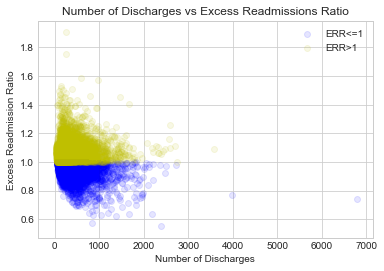

In [42]:
plt.scatter(set1['Number of Discharges'], set1['Excess Readmission Ratio'], c='b', label="ERR<=1", alpha=0.10)
plt.scatter(set2['Number of Discharges'], set2['Excess Readmission Ratio'], c='y', label='ERR>1', alpha=0.1)
plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.title('Number of Discharges vs Excess Readmissions Ratio')
plt.legend()

# Using difference in "Number of Discharges of two groups ERR>1 & ERR<=1"

In [52]:
##Difference in mean of # discharges
mean_diff=(np.mean(set1['Number of Discharges'])-np.mean(set2['Number of Discharges']))
print(mean_diff)

30.8135694177


In [61]:
#standard deviation for difference in mean of # of discharges
var1=np.var(set1['Number of Discharges'])
var2=np.var(set2['Number of Discharges'])
            
std_diff=np.sqrt(var1/len(set1) + var2/len(set2))
std_diff

5.7687161510289453

In [64]:
# TO Determine 95% CI we will calculate Z critical
Z_critical=stats.norm.ppf(0.975)
Z_critical

1.959963984540054

In [65]:
margin_of_error=Z_critical*std_diff

In [66]:
Upper_CI=mean_diff+margin_of_error
Lower_CI=mean_diff-margin_of_error
print(Lower_CI,Upper_CI)

19.5070935246 42.1200453107


In [70]:
## degrees of freedom
H1= var1/len(set1)
H2= var2/len(set2)
df1=((H1+H2)**2)/(((H1**2)/len(set1))+((H2**2)/len(set2)))
df1


11219.47633201871

In [72]:
# t_statistic
t_value=(mean_diff-0)/std_diff
t_value

5.3414951630434082

In [73]:
p_value1 = stats.t.sf(np.abs(t_value), df1)*2  # two-sided pvalue
p_value1

9.3985230321737674e-08

# p_value <0.05 and also <0.01 which means Ho can be rejected 

H1: There is significant difference between "number of discharges" for hospitals with exess readmission ratio <=1 and those with excess readmission ratio>1 There is 95% confidence that this difference in mean of "number discharges" is 19.507 to 42.12.

# Q5B. Look at the scatterplot above

What are the advantages and disadvantages of using this plot to convey information?

Advantages: It has clear labels of axis titles and what it is all about

Disadvantages: It is difficult to see the difference or boundary of in the samples that have excess readmission ration <=1 and those>1. It can b represented by different colors. I cannot quickly see the correlation of the two axis. Maybe a trendline will help.

Construct another plot that conveys the same information in a more direct manner.

In [74]:
## Calclating Equation of Trend Line
## I could have used this line in calculating p_value for correlation coefficient but I did the long cut above 
x=clean_hospital_read_df['Number of Discharges']
y=clean_hospital_read_df['Excess Readmission Ratio']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print(slope, intercept, r_value, p_value, std_err)

-2.90105173306e-05 1.01810614737 -0.0973979435108 1.22254737767e-25 2.76491273491e-06


In [75]:
X=clean_hospital_read_df['Number of Discharges'].sort_values()
y_trend=(slope)*X + 1.02

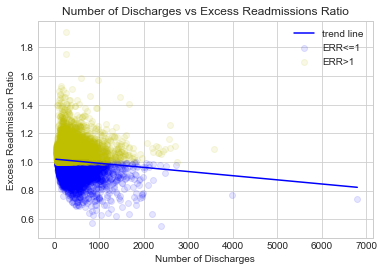

In [76]:
plt.scatter(set1['Number of Discharges'], set1['Excess Readmission Ratio'], c='b', label="ERR<=1", alpha=0.10)
plt.scatter(set2['Number of Discharges'], set2['Excess Readmission Ratio'], c='y', label='ERR>1', alpha=0.1)
plt.plot(X, y_trend, c='b', label='trend line')

plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.title('Number of Discharges vs Excess Readmissions Ratio')
plt.legend()